In [2]:
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot  as plt

In [3]:
df = pd.read_excel("Data/Afluencia_Metro_2024.xlsx")

In [4]:
df = df.rename(columns={'Día':'Dia','Línea de Servicio':"Linea de Servicio"})

In [5]:
df['Dia'] = df['Dia'].str.replace(".","-")
df['Dia'] = pd.to_datetime(df['Dia'],format='%d-%m-%Y')

In [6]:
df_melted = pd.melt(df, id_vars=['Dia', 'Linea de Servicio'], var_name='Hora', value_name='Num pasajeros')

In [7]:
df_linea_hora = df_melted.groupby(['Linea de Servicio', 'Hora'])['Num pasajeros'].mean().reset_index()


In [8]:
df_linea_hora = df_linea_hora[~df_linea_hora['Hora'].str.contains("Total general \(Número de pasajeros\)", na=False)]


<>:1: SyntaxWarning: invalid escape sequence '\('
<>:1: SyntaxWarning: invalid escape sequence '\('
C:\Users\User\AppData\Local\Temp\ipykernel_8532\3940219263.py:1: SyntaxWarning: invalid escape sequence '\('
  df_linea_hora = df_linea_hora[~df_linea_hora['Hora'].str.contains("Total general \(Número de pasajeros\)", na=False)]


In [9]:
print(df_linea_hora['Hora'].unique())

[datetime.time(4, 0) datetime.time(5, 0) datetime.time(6, 0)
 datetime.time(7, 0) datetime.time(8, 0) datetime.time(9, 0)
 datetime.time(10, 0) datetime.time(11, 0) datetime.time(12, 0)
 datetime.time(13, 0) datetime.time(14, 0) datetime.time(15, 0)
 datetime.time(16, 0) datetime.time(17, 0) datetime.time(18, 0)
 datetime.time(19, 0) datetime.time(20, 0) datetime.time(21, 0)
 datetime.time(22, 0) datetime.time(23, 0)]


In [10]:
plt.figure(figsize=(20, 6))

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

In [11]:
df_linea_hora['Hora'] = df_linea_hora['Hora'].astype(str).str[:-3]
df_linea_hora['Hora']

0      04:00
1      05:00
2      06:00
3      07:00
4      08:00
       ...  
246    19:00
247    20:00
248    21:00
249    22:00
250    23:00
Name: Hora, Length: 240, dtype: object

In [169]:
#df_linea_hora['Hora'] = pd.to_timedelta(df_linea_hora['Hora'].astype(str))

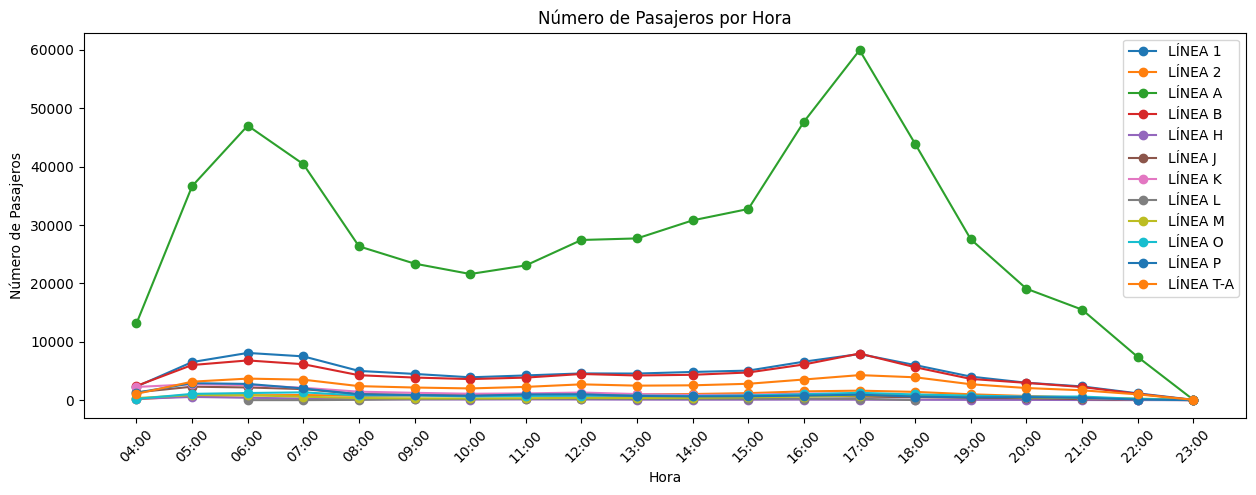

In [12]:
plt.figure(figsize=(15,5))
for linea in df_linea_hora['Linea de Servicio'].unique():
    subset = df_linea_hora[df_linea_hora['Linea de Servicio'] == linea]
    plt.plot(subset['Hora'].astype(str), subset['Num pasajeros'], marker='o', label=linea)

plt.xlabel('Hora')
plt.ylabel('Número de Pasajeros')
plt.title('Número de Pasajeros por Hora')
plt.legend()
plt.xticks(rotation=45)

plt.show()

In [16]:
print(df_linea_hora['Linea de Servicio'].unique())

['LÍNEA 1' 'LÍNEA 2' 'LÍNEA A' 'LÍNEA B' 'LÍNEA H' 'LÍNEA J' 'LÍNEA K'
 'LÍNEA L' 'LÍNEA M' 'LÍNEA O' 'LÍNEA P' 'LÍNEA T-A']


In [17]:
linea_category = {
    'LÍNEA 1' : 'Metro Plus',
    'LÍNEA 2' : 'Metro Plus',
    'LÍNEA A' : 'Metro',
    'LÍNEA B' : 'Metro',
    'LÍNEA H' : 'Cable',
    'LÍNEA J' : 'Cable',
    'LÍNEA K' : 'Cable',
    'LÍNEA L' : 'Cable',
    'LÍNEA M' : 'Cable',
    'LÍNEA O' : 'Metro Plus',
    'LÍNEA P' : 'Cable',
    'LÍNEA T-A' : 'Tranvia',

}

In [18]:
df_linea_hora['Sistema'] = df_linea_hora['Linea de Servicio'].map(linea_category)

In [24]:
df_system = df_linea_hora.groupby(['Sistema'])['Num pasajeros'].sum().reset_index()

In [25]:
df_system

,Sistema,Num pasajeros
0,Cable,73623.791588
1,Metro,655746.673033
2,Metro Plus,124469.732960
3,Tranvia,50028.714799


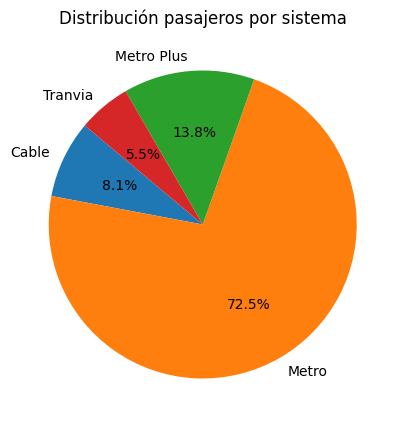

In [29]:
plt.figure(figsize=(15,5))
plt.pie(df_system['Num pasajeros'], labels=df_system['Sistema'], autopct='%1.1f%%', startangle=140)
plt.title('Distribución pasajeros por sistema')
plt.show()


In [39]:
df_melted

,Dia,Linea de Servicio,Hora,Num pasajeros
0,2024-01-01,LÍNEA 1,04:00:00,180.0
1,2024-01-01,LÍNEA 2,04:00:00,1.0
2,2024-01-01,LÍNEA A,04:00:00,1460.0
3,2024-01-01,LÍNEA B,04:00:00,231.0
4,2024-01-01,LÍNEA H,04:00:00,NaN
...,...,...,...,...
45040,2024-06-30,LÍNEA L,Total general (Número de pasajeros),1516.0
45041,2024-06-30,LÍNEA M,Total general (Número de pasajeros),4474.0
45042,2024-06-30,LÍNEA O,Total general (Número de pasajeros),6515.0
45043,2024-06-30,LÍNEA P,Total general (Número de pasajeros),7151.0


In [41]:
df_dia_hora = df_melted.groupby(['Linea de Servicio','Dia','Hora'])['Num pasajeros'].mean().reset_index()


In [46]:
dias_semana = {
    'Monday': 'Lunes',
    'Tuesday': 'Martes',
    'Wednesday': 'Miércoles',
    'Thursday': 'Jueves',
    'Friday': 'Viernes',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}

In [47]:
df_dia_hora['Dia_Semana'] = df_dia_hora['Dia'].dt.day_name().map(dias_semana)

In [63]:
df_filtered = df_dia_hora[(df_dia_hora['Dia'] == '2024-01-01') & (df_dia_hora['Linea de Servicio'] == 'LÍNEA 1')]


In [64]:
df_filtered

,Linea de Servicio,Dia,Hora,Num pasajeros,Dia_Semana
0,LÍNEA 1,2024-01-01,04:00:00,180.0,Lunes
1,LÍNEA 1,2024-01-01,05:00:00,858.0,Lunes
2,LÍNEA 1,2024-01-01,06:00:00,886.0,Lunes
3,LÍNEA 1,2024-01-01,07:00:00,721.0,Lunes
4,LÍNEA 1,2024-01-01,08:00:00,659.0,Lunes
5,LÍNEA 1,2024-01-01,09:00:00,820.0,Lunes
6,LÍNEA 1,2024-01-01,10:00:00,952.0,Lunes
7,LÍNEA 1,2024-01-01,11:00:00,1083.0,Lunes
8,LÍNEA 1,2024-01-01,12:00:00,1189.0,Lunes
9,LÍNEA 1,2024-01-01,13:00:00,1412.0,Lunes
